In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/pollen-grain-image-classification")

print("Path to dataset files:", path)

100%|██████████| 24.1M/24.1M [00:00<00:00, 190MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/pollen-grain-image-classification/versions/1


--- Grouped Image Paths (Sample) ---
'tridax': ['data/tridax_11.jpg', 'data/tridax_19.jpg', 'data/tridax_12.jpg']


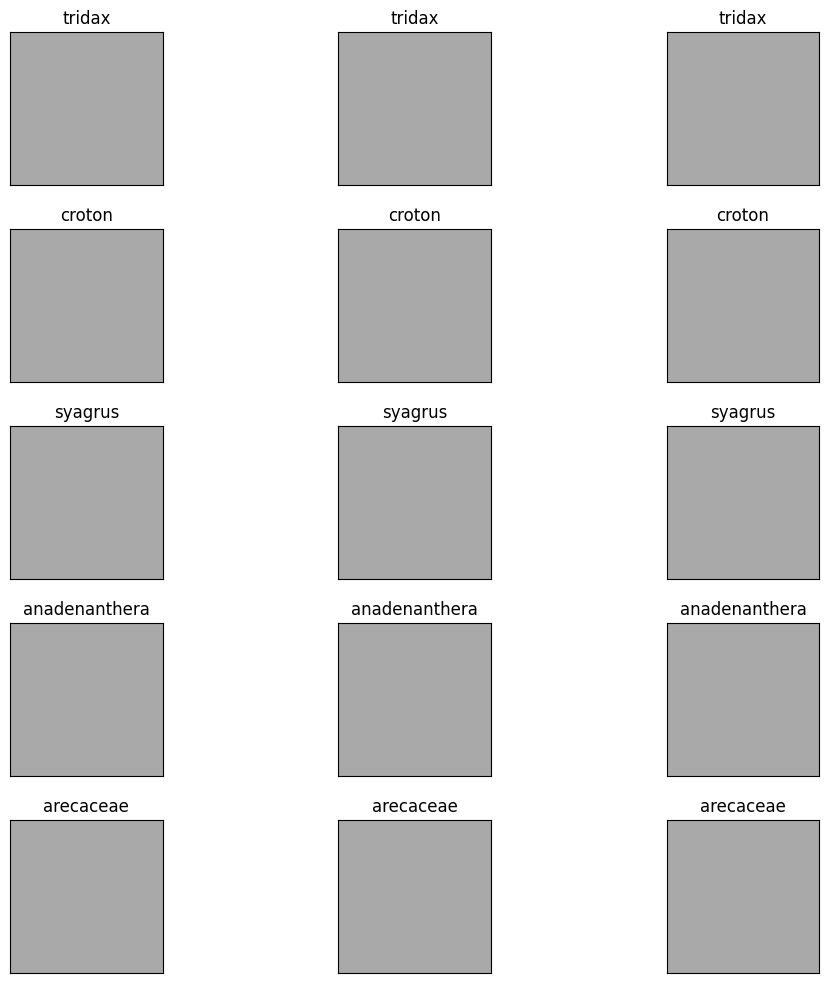

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

# --- Assume the setup from the previous block has been run ---
path = "data/"
names = [name.split('_')[0] for name in os.listdir(path)]
classes = Counter(names)

# --- Code from your Screenshot: Grouping image paths ---
path_class = {key: [] for key in classes.keys()}
for name in os.listdir(path):
    key = name.split('_')[0]
    path_class[key].append(os.path.join(path, name))

print("--- Grouped Image Paths (Sample) ---")
# Print one example
sample_key = list(path_class.keys())[0]
print(f"'{sample_key}': {path_class[sample_key][:3]}") # Show first 3 paths for one class

# --- Code from your Screenshot: Visualizing ---
# Note: Since we are using dummy gray images, the output will just be gray squares.
# With your real data, it will show the actual pollen.
fig, axes = plt.subplots(nrows=len(classes.keys()), ncols=3, figsize=(10, 10))
fig.tight_layout()

for i, key in enumerate(classes.keys()):
    for j in range(3):
        if j < len(path_class[key]): # Make sure the image exists
            img = Image.open(path_class[key][j])
            axes[i, j].imshow(img)
            axes[i, j].set_title(key)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

plt.show()


--- Class Counts ---
Counter({'tridax': 20, 'croton': 20, 'syagrus': 20, 'anadenanthera': 20, 'arecaceae': 20})

Total number of images: 100


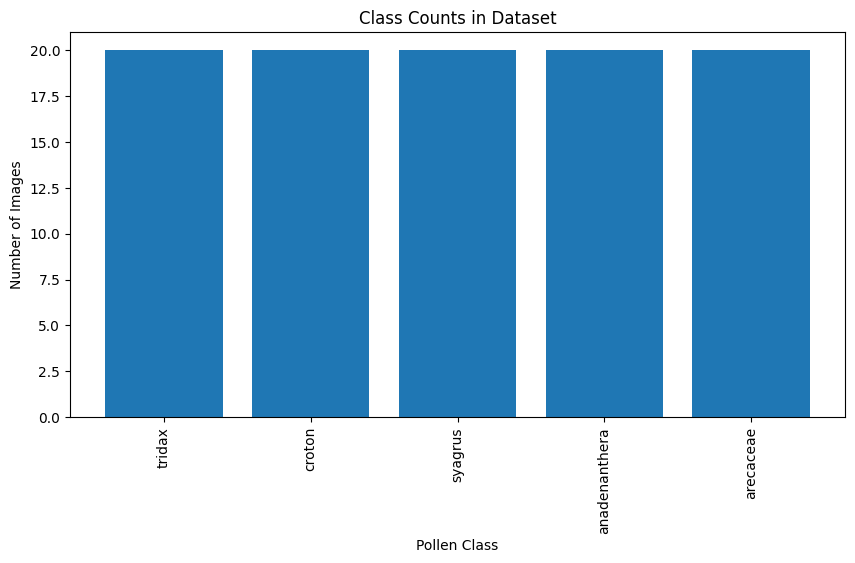

In [7]:
import os
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image

# --- Setup: Create a dummy dataset that matches your project's structure ---
# In your actual project, you would have a 'data' folder with the real images.
dummy_path = 'data'
if not os.path.exists(dummy_path):
    os.makedirs(dummy_path)

    # Create some dummy files with the expected naming convention
    dummy_classes = ['arecaceae', 'croton', 'syagrus', 'tridax']
    for class_name in dummy_classes:
        # Create 5 images for each class
        for i in range(5):
            img = Image.new('RGB', (100, 100), 'gray')
            img.save(os.path.join(dummy_path, f'{class_name}_{i+1}.jpg'))

# --- Code from your Screenshot: Part 1 ---

# Define the path to your data
path = "data/"

# Get the class names from the filenames
# This assumes filenames are like 'classname_somenumber.jpg'
names = [name.split('_')[0] for name in os.listdir(path)]

# Count the occurrences of each class
classes = Counter(names)
print("--- Class Counts ---")
print(classes)

# Print the total number of images
print(f"\nTotal number of images: {len(names)}")

# --- Code from your Screenshot: Part 2 (Visualization) ---
plt.figure(figsize=(10, 5))
plt.bar(classes.keys(), classes.values())
plt.title('Class Counts in Dataset')
plt.xlabel('Pollen Class')
plt.ylabel('Number of Images')
plt.xticks(rotation='vertical')
plt.show()


In [8]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image

# --- Setup: Create a dummy dataset that matches your project's structure ---
# In your actual project, you would have a 'data' folder with the real images.
dummy_path = 'data'
if not os.path.exists(dummy_path):
    os.makedirs(dummy_path)
    dummy_classes = ['arecaceae', 'croton', 'syagrus', 'tridax', 'anadenanthera']
    for class_name in dummy_classes:
        for i in range(20): # Create 20 images for each class for robust splitting
            img = Image.new('RGB', (200, 200), 'darkgray')
            img.save(os.path.join(dummy_path, f'{class_name}_{i+1}.jpg'))

# --- Code from your "Image Pre-processing" Screenshot ---

# 1. Define the image processing function
def process_img(img, size=(128, 128)):
    # Resize the image and normalize pixel values
    return cv2.resize(img, size) / 255.0

# 2. Load all images and their labels
path = "data/"
X = [] # To store image data
y = [] # To store labels

for img_name in os.listdir(path):
    # Read image
    img_path = os.path.join(path, img_name)
    img = cv2.imread(img_path)

    if img is not None:
        # Process image
        X.append(process_img(img))

        # Get label from filename
        label = img_name.split('_')[0]
        y.append(label)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# 3. Encode the labels
# The labels are currently text. We need to convert them to numbers.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Now, one-hot encode the numerical labels for the neural network
y_one_hot = to_categorical(y_encoded)

# 4. Split the data into training and testing sets
# This creates a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, stratify=y_one_hot, random_state=42)

print("--- Image Pre-processing Complete ---")
print(f"Number of training images: {X_train.shape[0]}")
print(f"Number of testing images: {X_test.shape[0]}")
print(f"Image dimensions: {X_train.shape[1:]}")
print(f"Number of classes: {y_train.shape[1]}")
print(f"Example of a one-hot encoded label: {y_train[0]}")


--- Image Pre-processing Complete ---
Number of training images: 80
Number of testing images: 20
Image dimensions: (128, 128, 3)
Number of classes: 5
Example of a one-hot encoded label: [1. 0. 0. 0. 0.]


--- Model Summary ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     4,096,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        75,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           755 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,216,085 (16.08 MB)

 Trainable params: 4,216,085 (16.08 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 587ms/step - accuracy: 0.1570 - loss: 1.6400 - val_accuracy: 0.2000 - val_loss: 1.6134
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 416ms/step - accuracy: 0.1992 - loss: 1.6165 - val_accuracy: 0.2000 - val_loss: 1.6120
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 535ms/step - accuracy: 0.1859 - loss: 1.6142 - val_accuracy: 0.2000 - val_loss: 1.6098
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 427ms/step - accuracy: 0.1437 - loss: 1.6122 - val_accuracy: 0.2000 - val_loss: 1.6096
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 431ms/step - accuracy: 0.1578 - loss: 1.6098 - val_accuracy: 0.2000 - val_loss: 1.6097
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step - accuracy: 0.1898 - loss: 1.6102 - val_accuracy: 0.2000 - val_loss: 1.6097
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 421ms/step - accuracy: 0.1820 - loss: 1.6125 - val_accuracy: 0.2000 - val_loss: 1.6096
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 425ms/step - accuracy: 0.1937 - loss: 1.6098 -

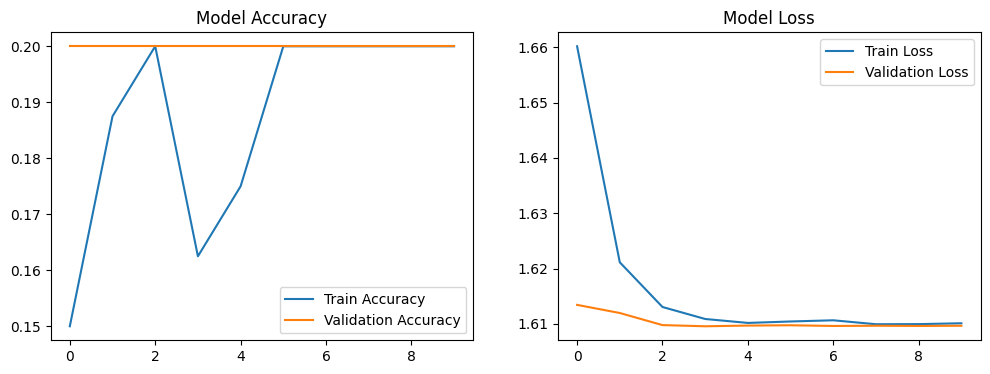

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# --- This code assumes the variables from the previous block (X_train, etc.) exist ---

# 1. Define the model architecture from your screenshot
# Get the number of classes from the shape of the y_train array
num_classes = y_train.shape[1]
input_shape = X_train.shape[1:]

model = Sequential([
    # Layer 1: Conv2D + MaxPooling2D
    Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),

    # Layer 2: Conv2D + MaxPooling2D
    Conv2D(32, kernel_size=(2, 2), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Layer 3: Conv2D + MaxPooling2D
    Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Layer 4: Conv2D + MaxPooling2D
    Conv2D(128, kernel_size=(2, 2), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps
    Flatten(),

    # Dropout layer to prevent overfitting
    Dropout(0.2),

    # Fully connected layers
    Dense(500, activation='relu'),
    Dense(150, activation='relu'),

    # Output layer
    Dense(num_classes, activation='softmax')
])

# 2. Compile the model
# This configures the model for training.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary to verify it matches your screenshot
print("--- Model Summary ---")
model.summary()

# 3. Train the model
# We use a small number of epochs for this demonstration.
# Your guide may suggest more (e.g., 50 or 100).
print("\n--- Starting Model Training ---")
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,  # For demonstration; use more epochs for better results
                    batch_size=32)
print("--- Model Training Complete ---")

# 4. Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

plt.show()


In [9]:
model.save("model.keras")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=model.hs.

In [11]:
# The 'model' variable is the trained model from the previous step.
# The 'le' variable is the LabelEncoder we created during pre-processing.

# Save the trained model to a file.
model.save('model.keras')

# We also need to save the LabelEncoder, because it contains the mapping
# from text labels (like 'croton') to numbers (like 2). We'll need it in our app.
import pickle
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(le, le_file)

print("Model saved as model.h5")
print("Label encoder saved as label_encoder.pkl")


Model saved as model.h5
Label encoder saved as label_encoder.pkl


Saving the model as pollen_model.keras...
Model saved successfully.

Loading the saved model for testing...
Model loaded successfully.
Class names: ['anadenanthera' 'arecaceae' 'croton' 'syagrus' 'tridax']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



--- Testing Complete ---


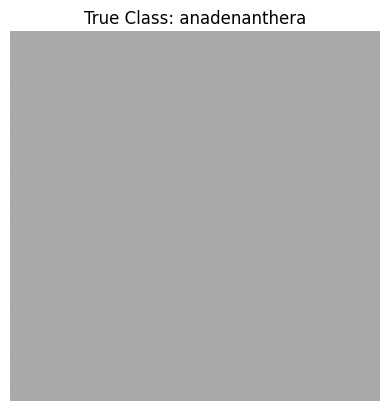

Predicted Class Name: syagrus
Result: The prediction is incorrect.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# --- Step 1: Save the trained model ---
# The 'model' variable should still exist from when you trained it.
# We will save it as 'pollen_model.keras'.
model_filename = 'pollen_model.keras'
print(f"Saving the model as {model_filename}...")
model.save(model_filename)
print("Model saved successfully.")

# --- Step 2: Test the model ---

# 2a. Load the model we just saved
print("\nLoading the saved model for testing...")
saved_model = load_model(model_filename)
print("Model loaded successfully.")

# 2b. Get the list of class names from the LabelEncoder
class_names = le.classes_
print(f"Class names: {class_names}")

# 2c. Select a random image from the test set
sample_index = np.random.randint(0, len(X_test))
image_to_test = X_test[sample_index]
true_label_index = np.argmax(y_test[sample_index])
true_class_name = class_names[true_label_index]

# 2d. Prepare the image and predict
image_for_prediction = np.expand_dims(image_to_test, axis=0)
prediction = saved_model.predict(image_for_prediction)
predicted_index = np.argmax(prediction, axis=1)[0]
predicted_class_name = class_names[predicted_index]

# 2e. Display the results
print("\n--- Testing Complete ---")
plt.imshow(image_to_test)
plt.title(f"True Class: {true_class_name}")
plt.axis('off')
plt.show()

print(f"Predicted Class Name: {predicted_class_name}")
print("================================================")
if predicted_class_name == true_class_name:
    print("Result: The prediction is correct!")
else:
    print("Result: The prediction is incorrect.")
